Installing the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset and previewing it

In [11]:
plttitanic = pd.read_csv("datasets\\tt_train.csv")
#print(plttitanic.head(10))
plttitanic.info()
print(plttitanic.isnull().sum())  # Total missing data with isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We will fill in missing data with mode, median or mean

In [4]:
plttitanic["Age"] = plttitanic["Age"].fillna(plttitanic["Age"].median())
plttitanic["Embarked"] = plttitanic["Embarked"].fillna(plttitanic["Embarked"].mode()[0])
plttitanic["Cabin_sec"] = plttitanic["Cabin"].notnull().astype(int)
plttitanic.drop("Cabin", axis=1, inplace=True)
print(plttitanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_sec      0
dtype: int64


Feature engineering

In [17]:
plttitanic["family_size"] = (
    plttitanic["SibSp"] +
    plttitanic["Parch"] + 1 )

plttitanic["title"] = plttitanic["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
plttitanic["solo"] = (plttitanic["family_size"] == 1).astype(int)

title_numbers = plttitanic["title"].value_counts()
freq_titles = title_numbers[title_numbers > 10].index
plttitanic["title_group"] = plttitanic["title"].apply(lambda x: x if x in freq_titles else "Others")

bins = [0, 12, 18, 35, 50, 65, 100]
labels = ['Child', 'Young', 'Adult', 'Middle Age', 'Old', 'Very Old']
plttitanic["age_group"] = pd.cut(plttitanic["Age"], bins=bins, labels=labels)

title_numbers = plttitanic["title"].value_counts()
freq_titles = title_numbers[title_numbers > 10].index
plttitanic["title_group"] = plttitanic["title"].apply(lambda x: x if x in freq_titles else "Others")


plttitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  family_size  891 non-null    int64   
 13  title        891 non-null    object  
 14  solo         891 non-null    int32   
 15  title_group  891 non-null    object  
 16  age_group    714 non-null    category
dtypes: category(1), float64(2), int32(1), int64(6), object(7)
memory usage: 1

Exploratory data analysis (EDA) - Visualization Phase

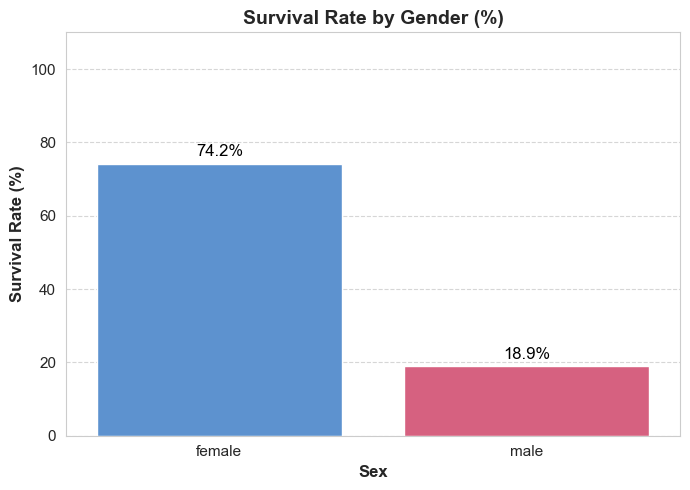

In [12]:
rations = plttitanic.groupby("Sex")["Survived"].mean().reset_index()
rations["percentage"] = rations["Survived"] * 100
sns.set_style("whitegrid")
plt.figure(figsize=(7,5))
colours = ["#4a90e2", "#e94e77"]    #color tones
barplot = sns.barplot(
    data=rations,
    x="Sex",
    y="percentage",
    hue="Sex",
    palette=colours,
    legend=False )

# Writing percentage on the bar
for container in barplot.containers: # Loop through each bar group (by gender)
    barplot.bar_label(container, fmt='%.1f%%', label_type='edge',
                      fontsize=12, color='black', padding=3)

plt.title("Survival Rate by Gender (%)", fontsize=14, fontweight="bold")
plt.xlabel("Sex", fontsize=12, fontweight="bold")
plt.ylabel("Survival Rate (%)", fontsize=12, fontweight="bold")
plt.ylim(0,110)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

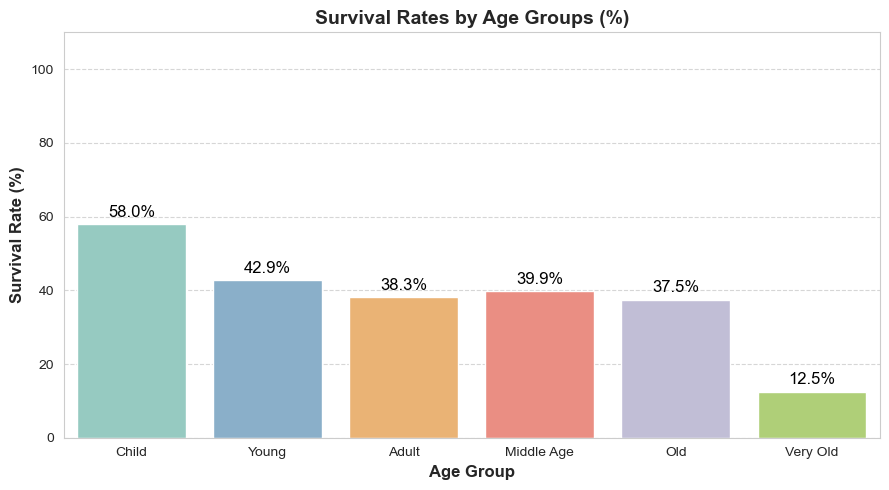

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,5))
age_ratio = (
    plttitanic.groupby("age_group", observed=False)["Survived"].mean().reset_index() )

age_ratio["percentage"] = age_ratio["Survived"] * 100

colours2 = ["#8dd3c7", "#80b1d3", "#fdb462", "#fb8072", "#bebada", "#b3de69"]
barplot = sns.barplot(
    data=age_ratio,
    x="age_group",
    y="percentage",
    hue="age_group",
    palette=colours2,
    legend=False )

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f%%', label_type='edge',
                      fontsize=12, color='black', padding=3)

plt.title("Survival Rates by Age Groups (%)", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12, fontweight="bold")
plt.ylabel("Survival Rate (%)", fontsize=12, fontweight="bold")
plt.ylim(0,110)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

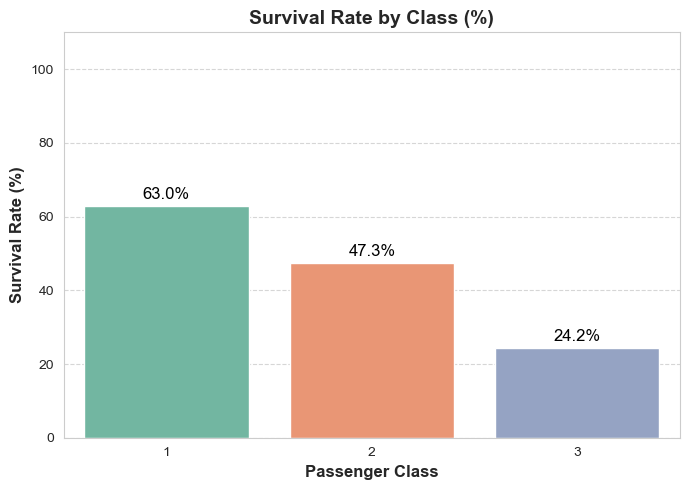

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(7,5))
class_ratio = (
    plttitanic.groupby("Pclass")["Survived"].mean().reset_index() )

class_ratio["percentage"] = class_ratio["Survived"] * 100
colours3 = ["#66c2a5", "#fc8d62", "#8da0cb"]
barplot = sns.barplot(
    data=class_ratio,
    x="Pclass",
    y="percentage",
    hue="Pclass",
    palette=colours3,
    legend=False )

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f%%', label_type='edge',
                      fontsize=12, color='black', padding=3)

plt.title("Survival Rate by Class (%)", fontsize=14, fontweight="bold")
plt.xlabel("Passenger Class",fontsize=12, fontweight="bold")
plt.ylabel("Survival Rate (%)", fontsize=12, fontweight="bold")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

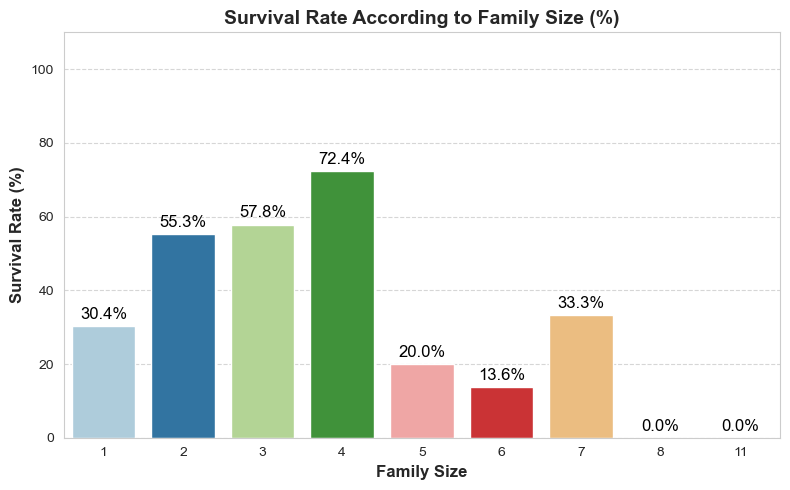

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
family_ratio = (
    plttitanic.groupby("family_size")["Survived"].mean().reset_index() )

family_ratio["percentage"] = family_ratio["Survived"] * 100

colours4 = sns.color_palette("Paired", n_colors=len(family_ratio))
barplot = sns.barplot(
    data=family_ratio,
    x="family_size",
    y="percentage",
    hue="family_size",
    palette=colours4,
    legend=False )

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f%%', label_type='edge',
                      fontsize=12, color='black', padding=3)

plt.title("Survival Rate According to Family Size (%)", fontsize=14, fontweight="bold")
plt.xlabel("Family Size", fontsize=12, fontweight="bold")
plt.ylabel("Survival Rate (%)", fontsize=12, fontweight="bold")
plt.ylim(0,110)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

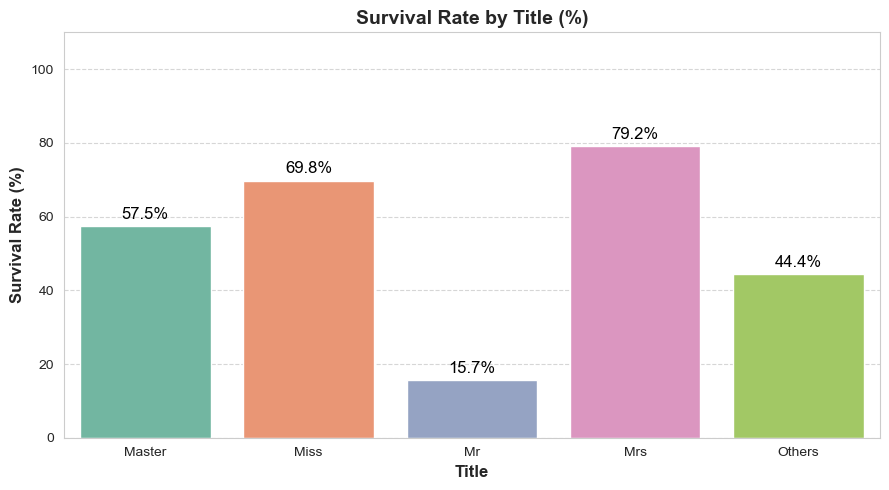

In [18]:
title_ratio = (
    plttitanic.groupby("title_group")["Survived"].mean().reset_index() )
title_ratio["percentage"] = title_ratio["Survived"] * 100

colours5 = sns.color_palette("Set2", n_colors=len(title_ratio))
plt.figure(figsize=(9,5))
barplot = sns.barplot(
    data=title_ratio,
    x="title_group",
    y="percentage",
    hue="title_group",
    palette=colours5,
    legend=False )

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f%%', label_type='edge',
                      fontsize=12, color='black',padding=3)

plt.title("Survival Rate by Title (%)", fontsize=14, fontweight='bold')
plt.xlabel("Title", fontsize=12, fontweight='bold')
plt.ylabel("Survival Rate (%)", fontsize=12, fontweight="bold")
plt.ylim(0,110)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

MODELING PHASE

In [19]:
columns_to_use = [
    'Pclass', 'Sex', 'Age', 'Embarked', 'Fare',
    'family_size', 'title', 'solo' ]
#onehot encode
data_model = pd.get_dummies(plttitanic[columns_to_use], drop_first=True)
label = plttitanic["Survived"]

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    data_model, label, test_size=0.2, random_state=42 )

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: %{accuracy * 100:.2f}")

Model Accuracy: %83.80


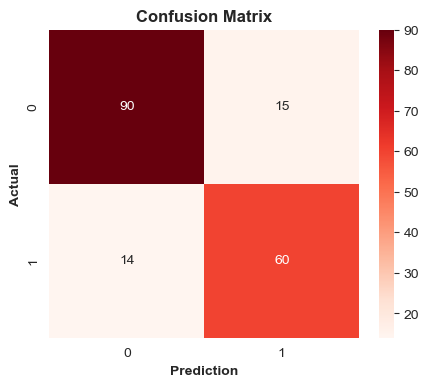

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix", fontweight="bold")
plt.xlabel("Prediction", fontweight="bold")
plt.ylabel("Actual", fontweight="bold")
plt.show()

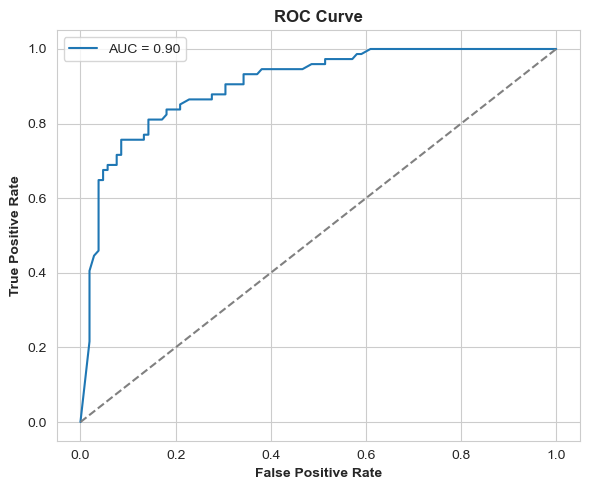

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve
y_probability = model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probability)
fpr, tpr, threshold = roc_curve(y_test, y_probability)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate', fontweight="bold")
plt.ylabel('True Positive Rate', fontweight="bold")
plt.title('ROC Curve', fontweight="bold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()